In [1]:
# Mounting google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Installing ultralytics to use YOLOV8 model
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.8 MB/s eta 0:00:00


In [3]:
# Importing libraries
import os
import cv2
import torch
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
from glob import glob
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import jaccard_score, accuracy_score

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Edit data.yaml file to add dataset path and specify classes
data_yaml_path = '/content/drive/MyDrive/Binary masks YoloV8/data.yaml'

with open(data_yaml_path, 'w') as f:
    f.write('''\
path: /content/drive/MyDrive/Binary masks YoloV8
train: images/train
val: images/valid
test: images/test

names:
  0: teeth
''')

In [5]:
# Train the YOLOv8 Model
model = YOLO('yolov8s-seg.pt')

model.train(
    data=data_yaml_path,
    epochs=20,
    imgsz=256,
    batch=8,
    save=True,
    project='/content/drive/MyDrive/Dental_YOLOv8',
    name='Dental_YOLOv8'
)

100%|██████████| 22.8M/22.8M [00:00<00:00, 76.7MB/s]


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Binary masks YoloV8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=256, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Dental_YOLOv8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

100%|██████████| 755k/755k [00:00<00:00, 34.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           


  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384,

train: Scanning /content/drive/MyDrive/Binary masks YoloV8/labels/train.cache... 416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 0.0±0.0 MB/s, size: 8.8 KB)


val: Scanning /content/drive/MyDrive/Binary masks YoloV8/labels/valid.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]

Plotting labels to /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.211      1.997      1.109      1.109        221        256: 100%|██████████| 52/52 [04:12<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:33<00:00,  8.29s/it]

                   all         52        675      0.699      0.836      0.719       0.49      0.687      0.822      0.706      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.013      1.572     0.6867      1.013        150        256: 100%|██████████| 52/52 [04:00<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.28s/it]

                   all         52        675      0.845       0.81       0.86      0.597      0.843      0.804      0.853      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.002        1.5     0.6711     0.9911        167        256: 100%|██████████| 52/52 [04:01<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.21s/it]

                   all         52        675       0.85      0.801       0.88      0.616      0.845      0.797      0.863       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.9484      1.452     0.6493     0.9882        198        256: 100%|██████████| 52/52 [04:00<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.24s/it]

                   all         52        675      0.884      0.807      0.898      0.658       0.88      0.804      0.893      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.9124      1.345     0.5998     0.9696        121        256: 100%|██████████| 52/52 [04:00<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.14s/it]

                   all         52        675      0.892      0.844      0.918      0.666      0.887      0.841      0.912      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.8954      1.316     0.5832     0.9646        131        256: 100%|██████████| 52/52 [03:57<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.25s/it]

                   all         52        675       0.89      0.834      0.922      0.683      0.882      0.833       0.92      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.8801      1.253     0.5759     0.9625        177        256: 100%|██████████| 52/52 [03:58<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.11s/it]

                   all         52        675      0.917       0.83      0.911      0.661      0.902       0.82      0.907      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.8603      1.257     0.5615     0.9495        141        256: 100%|██████████| 52/52 [03:56<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.14s/it]

                   all         52        675      0.873      0.859      0.926      0.695      0.873      0.845      0.911      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.8382      1.221     0.5486     0.9453        165        256: 100%|██████████| 52/52 [03:58<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.22s/it]

                   all         52        675      0.867      0.874       0.93      0.716      0.861      0.854      0.919      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.8393      1.207     0.5398     0.9396        141        256: 100%|██████████| 52/52 [03:56<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.19s/it]

                   all         52        675      0.902      0.864      0.941      0.729      0.888       0.85      0.927      0.649


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.7951      1.204     0.5535     0.9339        112        256: 100%|██████████| 52/52 [03:47<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.37s/it]

                   all         52        675       0.87      0.859      0.919      0.681      0.886       0.84      0.915      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.7852      1.132     0.5305     0.9242         75        256: 100%|██████████| 52/52 [03:47<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.12s/it]

                   all         52        675      0.898      0.847      0.929      0.715      0.888      0.839      0.919      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      0.748      1.075      0.506     0.9243         91        256: 100%|██████████| 52/52 [03:46<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.09s/it]

                   all         52        675      0.903      0.871       0.93      0.723      0.903      0.871      0.926      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.7298      1.079     0.4878      0.911         77        256: 100%|██████████| 52/52 [03:49<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.11s/it]

                   all         52        675        0.9       0.87      0.928      0.743      0.882      0.868      0.919      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.7278      1.073     0.4851     0.9119         80        256: 100%|██████████| 52/52 [03:48<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.17s/it]

                   all         52        675       0.89      0.876      0.935       0.73      0.897      0.858      0.924      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.7287      1.012     0.4738     0.9111        102        256: 100%|██████████| 52/52 [03:47<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.10s/it]

                   all         52        675       0.89      0.892      0.937       0.75       0.88      0.882      0.933      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.7089      1.041     0.4656     0.8978         87        256: 100%|██████████| 52/52 [03:48<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:13<00:00,  3.32s/it]

                   all         52        675      0.873      0.898      0.935      0.744      0.863      0.889      0.925      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.6928      1.027     0.4482     0.9014        106        256: 100%|██████████| 52/52 [03:46<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.03s/it]

                   all         52        675      0.896      0.901      0.942      0.751      0.908      0.872      0.936      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.6898     0.9979     0.4412     0.8998        112        256: 100%|██████████| 52/52 [03:48<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  3.00s/it]

                   all         52        675      0.883      0.898      0.942      0.762      0.901      0.881      0.938      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.6645     0.9717     0.4345     0.8889        107        256: 100%|██████████| 52/52 [03:50<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:12<00:00,  3.19s/it]

                   all         52        675      0.889      0.898      0.944      0.765      0.888      0.885       0.94      0.677



20 epochs completed in 1.382 hours.
Optimizer stripped from /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8/weights/last.pt, 23.8MB
Optimizer stripped from /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8/weights/best.pt, 23.8MB

Validating /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:03<00:09,  3.28s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:07<00:07,  3.69s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:15<00:00,  3.76s/it]


                   all         52        675      0.883      0.898      0.942      0.762      0.901      0.881      0.938      0.688
Speed: 0.8ms preprocess, 254.4ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0e5db1a1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [6]:
# Display Accuracy Metrics
metrics = model.val(split='test', verbose=False)
seg = metrics.seg
print("Segmentation Metrics (Test Set):")
print(f"Precision:     {seg.mp:.4f}")
print(f"Recall:        {seg.mr:.4f}")
print(f"mAP@0.5:       {seg.map50:.4f}")
print(f"mAP@0.5:0.95:  {seg.map:.4f}")


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.0±0.0 MB/s, size: 8.6 KB)


val: Scanning /content/drive/MyDrive/Binary masks YoloV8/labels/test.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:05<00:30,  5.04s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:09<00:23,  4.67s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:30<00:00,  4.36s/it]


                   all         52        627      0.879      0.901      0.942      0.781      0.885      0.892      0.939      0.697
Speed: 0.4ms preprocess, 199.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv82
Segmentation Metrics (Test Set):
Precision:     0.8851
Recall:        0.8915
mAP@0.5:       0.9390
mAP@0.5:0.95:  0.6966


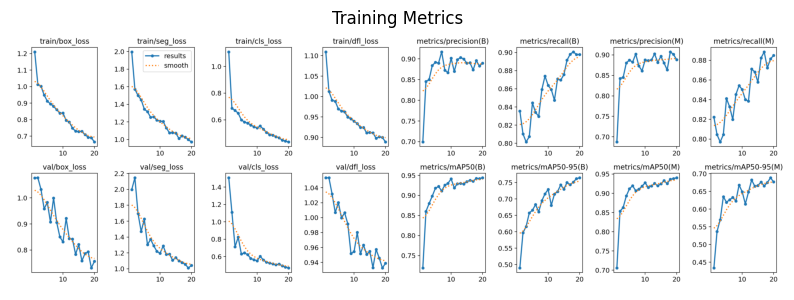

In [7]:
# Display Training Metrics
image_path = '/content/drive/MyDrive/Dental_YOLOv8/Dental_YOLOv8/results.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Training Metrics")
plt.show()

In [8]:
# Function to rasterize YOLO segmentation labels into binary mask
def load_yolo_segmentation_mask(label_path, img_shape):
    h, w = img_shape
    mask = np.zeros((h, w), dtype=np.uint8)
    if not os.path.exists(label_path):
        return mask

    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 6:
                continue
            coords = list(map(float, parts[1:]))
            points = np.array(coords).reshape(-1, 2)
            points *= np.array([w, h])
            points = points.astype(np.int32)
            cv2.fillPoly(mask, [points], 1)

    return mask

In [9]:
# Directories
img_dir = '/content/drive/MyDrive/Binary masks YoloV8/images/test'
label_dir = '/content/drive/MyDrive/Binary masks YoloV8/labels/test'

# Load all test image paths
image_files = sorted(glob(os.path.join(img_dir, '*.jpg')))

# Select up to 5 random images
num_images = min(5, len(image_files))
image_files = random.sample(image_files, num_images)

In [10]:
# Predict
results = model.predict(image_files, imgsz=256, save=False, stream=True)

# Loop through results and display
for i, result in enumerate(results):
    image_path = image_files[i]
    label_path = os.path.join(label_dir, os.path.basename(image_path).replace('.jpg', '.txt'))

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Ground truth mask
    gt_mask_bin = load_yolo_segmentation_mask(label_path, (h, w))

    # Predicted mask
    pred_mask_bin = np.zeros((h, w), dtype=np.uint8)
    if result.masks is not None:
        for m in result.masks.data:
            m = m.cpu().numpy()
            m = cv2.resize(m, (w, h), interpolation=cv2.INTER_NEAREST)
            pred_mask_bin = np.logical_or(pred_mask_bin, m > 0.5).astype(np.uint8)

    # Evaluation
    iou = jaccard_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())
    acc = accuracy_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())

    # Create color mask overlays
    green_mask = np.zeros_like(img)
    green_mask[gt_mask_bin == 1] = [0, 255, 0]  # Ground truth in green

    blue_mask = np.zeros_like(img)
    blue_mask[pred_mask_bin == 1] = [0, 0, 255]  # Prediction in blue (BGR to RGB = Blue)

    # Blend masks with original image
    overlay_gt = cv2.addWeighted(img, 1.0, green_mask, 0.4, 0)
    overlay_pred = cv2.addWeighted(img, 1.0, blue_mask, 0.4, 0)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original Image")

    axs[1].imshow(overlay_gt)
    axs[1].set_title("Ground Truth Mask (Green, 50%)")

    axs[2].imshow(overlay_pred)
    axs[2].set_title(f"Predicted Mask (Blue, 50%)\nIoU: {iou:.3f}, Accuracy: {acc:.3f}")

    for ax in axs:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:
ious = []
accuracies = []
# Predict
results = model.predict(image_files, imgsz=256, save=False, stream=True)

# Loop through results and evaluate
for i, result in enumerate(results):
    image_path = image_files[i]
    label_path = os.path.join(label_dir, os.path.basename(image_path).replace('.jpg', '.txt'))

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Ground truth mask
    gt_mask_bin = load_yolo_segmentation_mask(label_path, (h, w))

    # Predicted mask
    pred_mask_bin = np.zeros((h, w), dtype=np.uint8)
    if result.masks is not None:
        for m in result.masks.data:
            m = m.cpu().numpy()
            m = cv2.resize(m, (w, h), interpolation=cv2.INTER_NEAREST)
            pred_mask_bin = np.logical_or(pred_mask_bin, m > 0.5).astype(np.uint8)

    # Evaluation
    iou = jaccard_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())
    acc = accuracy_score(gt_mask_bin.flatten(), pred_mask_bin.flatten())

    ious.append(iou)
    accuracies.append(acc)


0: 256x256 12 teeths, 219.0ms
1: 256x256 16 teeths, 219.0ms
2: 256x256 16 teeths, 219.0ms
3: 256x256 9 teeths, 219.0ms
4: 256x256 17 teeths, 219.0ms
Speed: 0.6ms preprocess, 219.0ms inference, 16.3ms postprocess per image at shape (1, 3, 256, 256)


In [12]:
# Display IOU and Accuracy
mean_iou = np.mean(ious)
mean_acc = np.mean(accuracies)

print(f"\nEvaluation Complete\n")
print(f"Mean IoU     : {mean_iou:.4f}")
print(f"Mean Accuracy: {mean_acc:.4f}")


Evaluation Complete

Mean IoU     : 0.8901
Mean Accuracy: 0.9600


In [13]:
# Save model
model_path = '/content/drive/MyDrive/Dental_YOLOv8.pt'
model.save(model_path)